<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/MNE%26acqReading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install bioread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=2525f18eb11cf61c9ff9a8ca7b2cb929e56691804e30ebda6cc783091638064e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [4]:
%pylab inline
import bioread
pylab.rcParams['figure.figsize'] = (14.0, 12.0)  # Make figures a bit bigger

Populating the interactive namespace from numpy and matplotlib


In [6]:
# This file is included in bioread
data = bioread.read_file('/content/drive/MyDrive/Iqram Sir/driving_simlulation/rest.acq')

In [7]:
data

AcqKnowledge file (rev 108): 6 channels, 1000.0 samples/sec

In [8]:

data.channels

[Channel EEG-Fz - EEG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel EEG-Oz - EEG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel EOG - EOG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel ECG - ECG100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel GSR - GSR100C: 65637 samples, 1000.0 samples/sec, loaded: True,
 Channel SKT - SKT100C: 65637 samples, 1000.0 samples/sec, loaded: True]

In [16]:
for chan in data.channels:
  print(chan.data,chan.time_index,chan.name,chan.units)
  break

[0.08331299 0.08480835 0.08203125 ... 0.06481934 0.05889893 0.05335999] [0.00000000e+00 1.00001524e-03 2.00003047e-03 ... 6.56350000e+01
 6.56360000e+01 6.56370000e+01] EEG-Fz - EEG100C mV


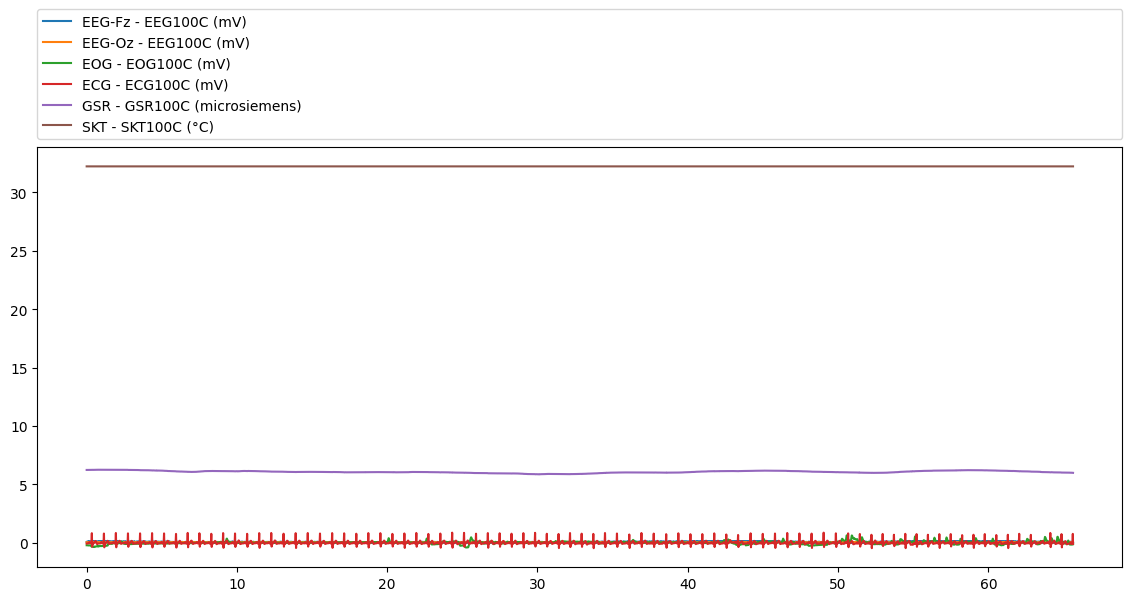

In [9]:
plt.subplot(211)

for chan in data.channels:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

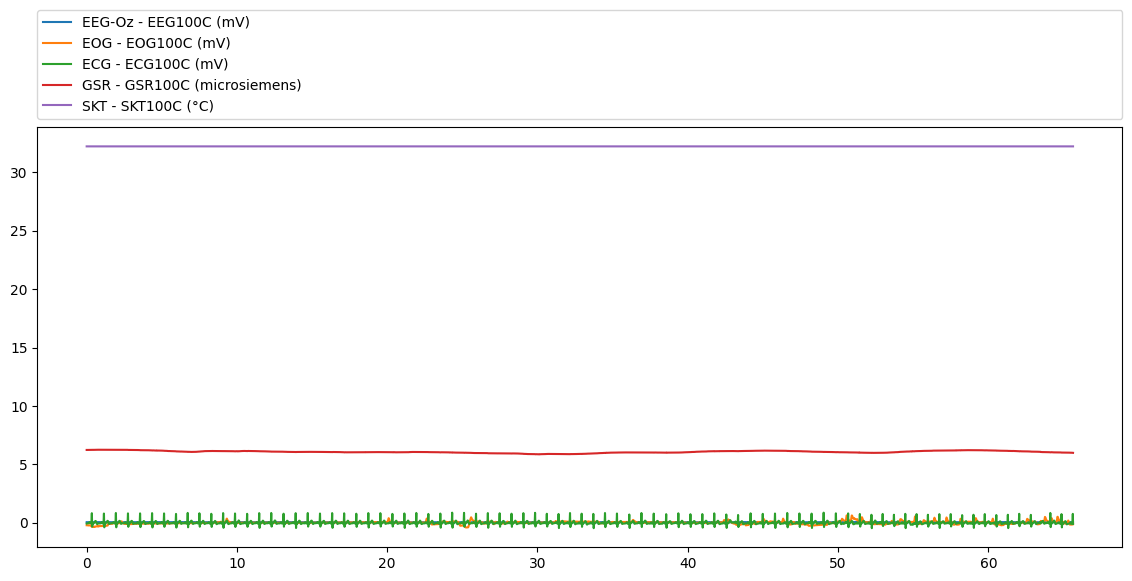

In [10]:
# The computed channel is putting the others way off-scale, let's exclude it
plt.subplot(211)
for chan in data.channels[1:]:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

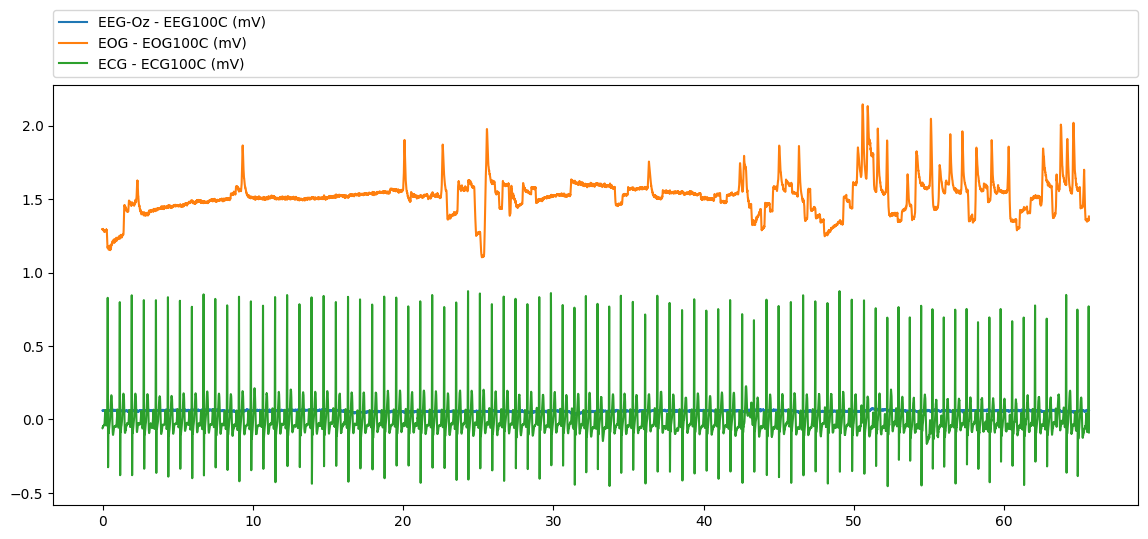

In [11]:
# And let's separate resp and ekg so we can see their traces better
plt.subplot(211)
ekg = data.channels[1]
resp = data.channels[2]
eda = data.channels[3]
plt.plot(ekg.time_index, ekg.data, label='{} ({})'.format(ekg.name, ekg.units))
plt.plot(resp.time_index, resp.data + 1.5, label='{} ({})'.format(resp.name, resp.units))
plt.plot(eda.time_index, eda.data, label='{} ({})'.format(eda.name, eda.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

In [12]:
for m in data.event_markers:
    print('{0}: Channel {1}, type {2}'.format(m.text, m.channel_name, m.type))

Segment 1: Channel None, type Append
Segment 2: Channel None, type Append
